In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('insurance_data.csv').drop(columns=['PatientID','index'])

In [4]:
df.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1335 non-null   float64
 1   gender         1340 non-null   object 
 2   bmi            1340 non-null   float64
 3   bloodpressure  1340 non-null   int64  
 4   diabetic       1340 non-null   object 
 5   children       1340 non-null   int64  
 6   smoker         1340 non-null   object 
 7   region         1337 non-null   object 
 8   claim          1340 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 94.3+ KB


In [6]:
for i in df.columns:
  print(i, " " ,(df[i].isnull().sum()/df[i].size)*100)

age   0.3731343283582089
gender   0.0
bmi   0.0
bloodpressure   0.0
diabetic   0.0
children   0.0
smoker   0.0
region   0.22388059701492538
claim   0.0


## Univariate Analysis

Start with age column as it is the most important column.

<Axes: ylabel='Frequency'>

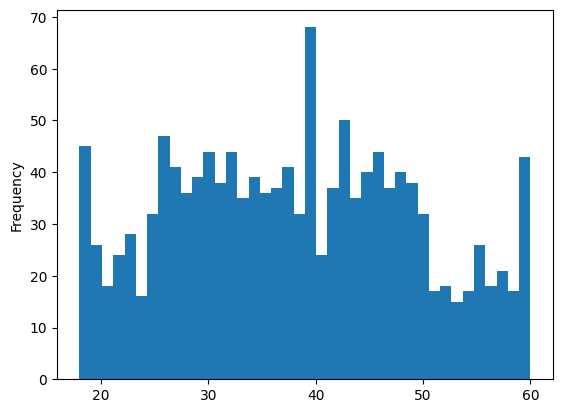

In [7]:
df['age'].plot(kind='hist',bins=40)

In [8]:
df['age'].describe(

)

count    1335.000000
mean       38.078652
std        11.102924
min        18.000000
25%        29.000000
50%        38.000000
75%        47.000000
max        60.000000
Name: age, dtype: float64

In [9]:
df[df['age'] > 50]['gender'].unique()

/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


array(['female'], dtype=object)

<Axes: ylabel='Density'>

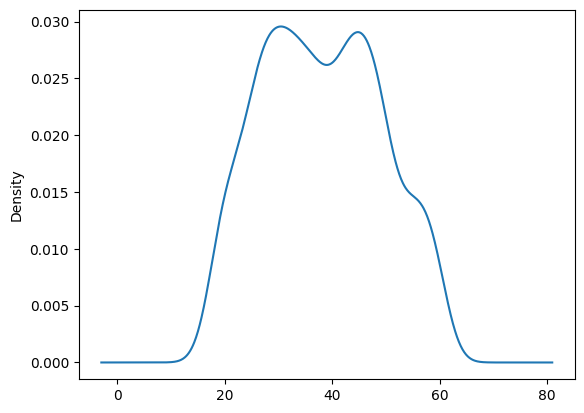

In [10]:
df['age'].plot(kind='kde')

In [11]:
df['age'].skew()

0.11361133741072638

<Axes: >

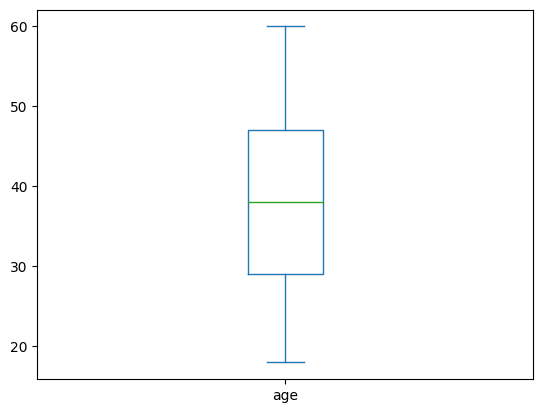

In [12]:
df['age'].plot(kind='box')

## BMI

<Axes: ylabel='Frequency'>

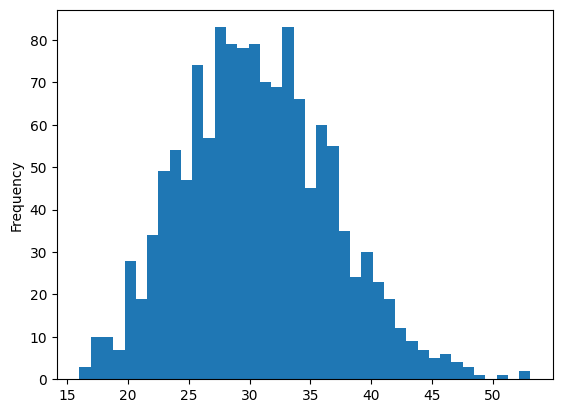

In [13]:
df['bmi'].plot(kind='hist',bins=40)

<Axes: ylabel='Density'>

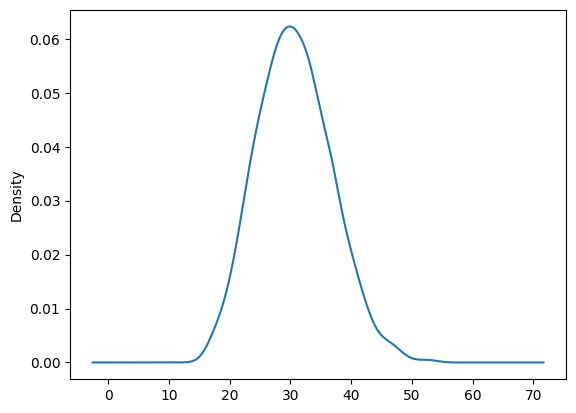

In [14]:
df['bmi'].plot(kind='kde')

In [15]:
df['bmi'].describe()

count    1340.000000
mean       30.668955
std         6.106735
min        16.000000
25%        26.275000
50%        30.400000
75%        34.700000
max        53.100000
Name: bmi, dtype: float64

In [16]:
df['bmi'].skew()

0.28597245020808587

<Axes: >

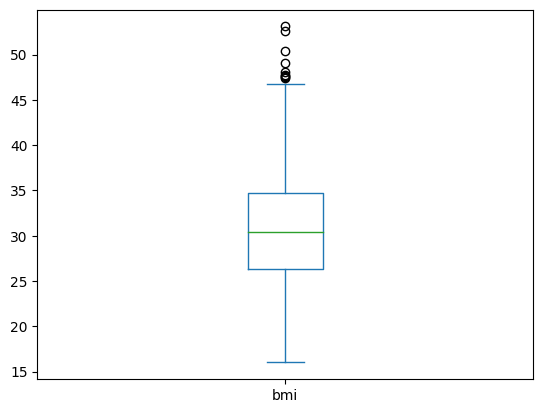

In [17]:
df['bmi'].plot(kind='box')

In [18]:
df[df['bmi'] > 46]

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
9,30.0,male,53.1,97,No,0,No,northwest,1163.46
141,46.0,male,50.4,89,Yes,1,No,southeast,2438.06
190,28.0,male,46.5,94,No,1,No,southeast,2927.06
331,43.0,male,46.5,83,Yes,2,No,southeast,4686.39
464,20.0,male,46.5,89,No,3,No,southeast,6435.62
579,25.0,male,47.5,84,Yes,1,No,southeast,8083.92
675,49.0,female,48.1,81,Yes,2,No,northeast,9432.93
682,27.0,female,46.1,106,No,1,No,southeast,9549.57
696,49.0,male,47.7,88,No,1,No,southeast,9748.91
802,42.0,male,49.1,109,Yes,0,No,southeast,11381.33


## Blood Pressure

In [19]:
df['bloodpressure'].describe()

count    1340.000000
mean       94.157463
std        11.434712
min        80.000000
25%        86.000000
50%        92.000000
75%        99.000000
max       140.000000
Name: bloodpressure, dtype: float64

<Axes: ylabel='Frequency'>

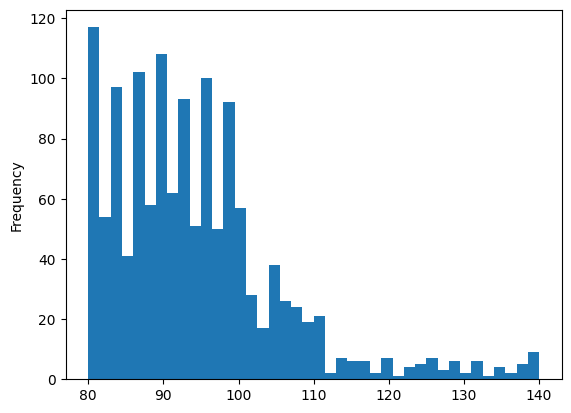

In [20]:
df['bloodpressure'].plot(kind='hist',bins=40)

<Axes: ylabel='Density'>

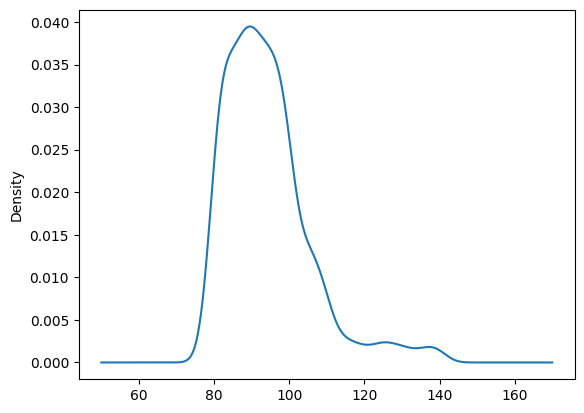

In [21]:
df['bloodpressure'].plot(kind='kde')

In [22]:
df['bloodpressure'].skew()

1.483534210229308

<Axes: >

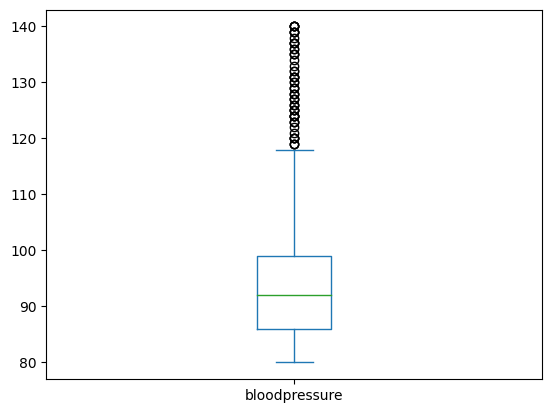

In [23]:
df['bloodpressure'].plot(kind='box')

In [24]:
(df[df['bloodpressure'] > 115].shape[0] / df['bloodpressure'].size)*100

5.223880597014925

## Children

In [25]:
df['children'].describe()

count    1340.000000
mean        1.093284
std         1.205334
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64

<Axes: ylabel='Frequency'>

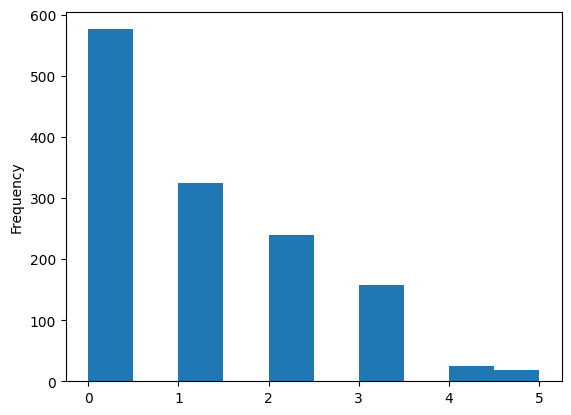

In [26]:
df['children'].plot(kind='hist')

<Axes: ylabel='Density'>

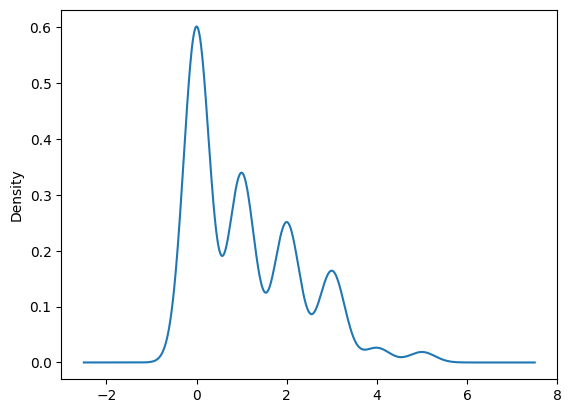

In [27]:
df['children'].plot(kind='kde')

In [28]:
df['children'].skew()

0.9402991133470963

<Axes: >

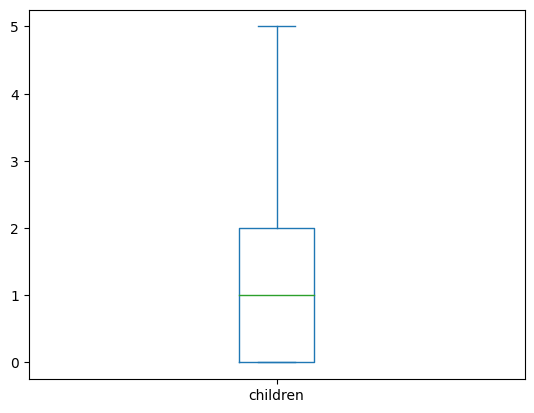

In [29]:
df['children'].plot(kind='box')

<Axes: ylabel='count'>

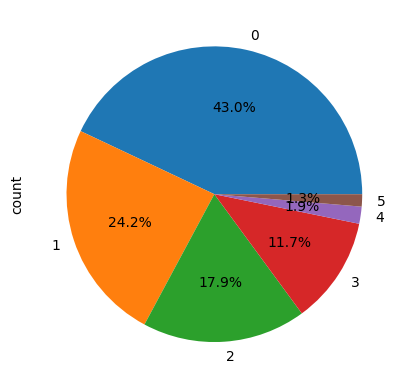

In [30]:
((df['children'].value_counts() / df.shape[0])*100).plot(kind='pie',autopct='%1.1f%%')

## Claim

In [31]:
df['claim'].describe()

count     1340.000000
mean     13252.745642
std      12109.609288
min       1121.870000
25%       4719.685000
50%       9369.615000
75%      16604.305000
max      63770.430000
Name: claim, dtype: float64

<Axes: ylabel='Density'>

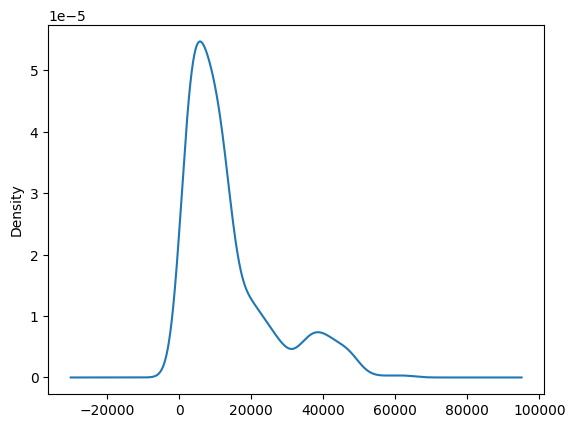

In [32]:
df['claim'].plot(kind='kde')

<Axes: >

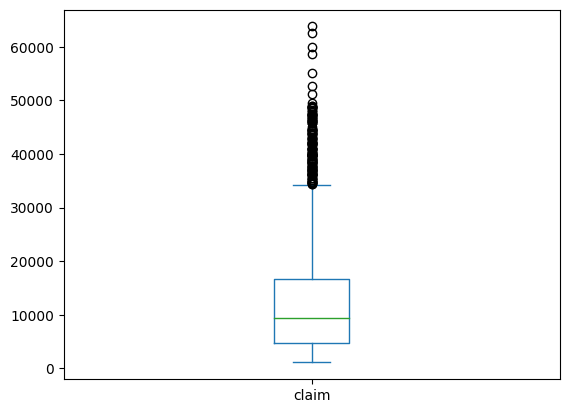

In [33]:
df['claim'].plot(kind='box')

In [34]:
(df[df['claim'] > 35000]['gender'].value_counts() / 133 )*100

gender
male      63.157895
female    36.842105
Name: count, dtype: float64

## Gender

In [35]:
(df['gender'].value_counts() / df['gender'].size)*100

gender
male      50.597015
female    49.402985
Name: count, dtype: float64

<Axes: ylabel='count'>

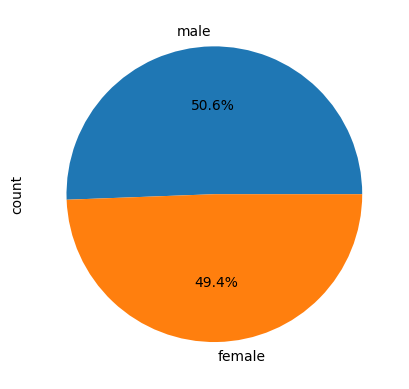

In [36]:
df['gender'].value_counts().plot(kind='pie',autopct='%1.1f%%')

<Axes: xlabel='gender'>

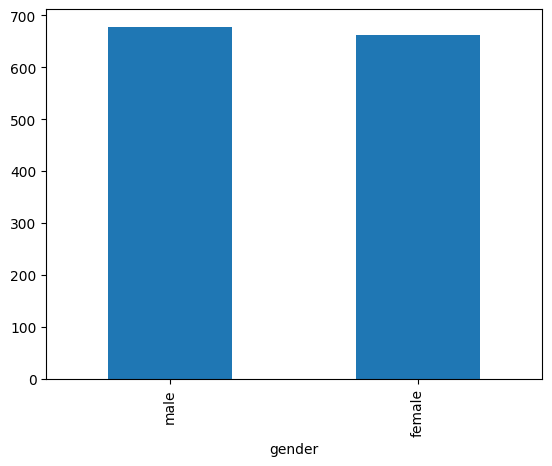

In [37]:
df['gender'].value_counts().plot(kind='bar')

## Diabetic

In [38]:
(df['diabetic'].value_counts() / df['diabetic'].size)*100

diabetic
No     52.089552
Yes    47.910448
Name: count, dtype: float64

<Axes: xlabel='diabetic', ylabel='count'>

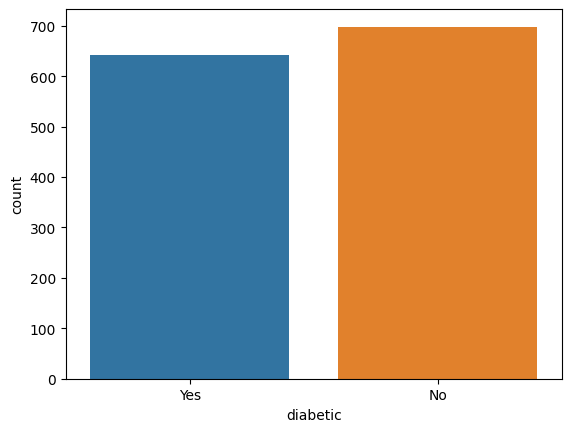

In [39]:
sns.countplot(data=df,x='diabetic')

## Smoker

<Axes: ylabel='count'>

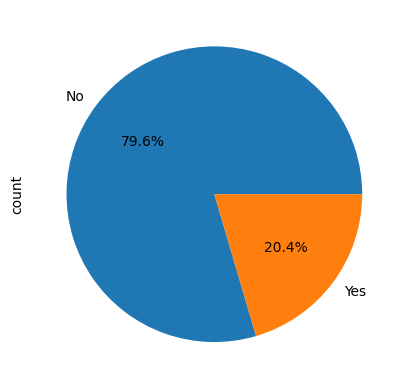

In [40]:
df['smoker'].value_counts().plot(kind='pie',autopct='%1.1f%%')

<Axes: xlabel='smoker'>

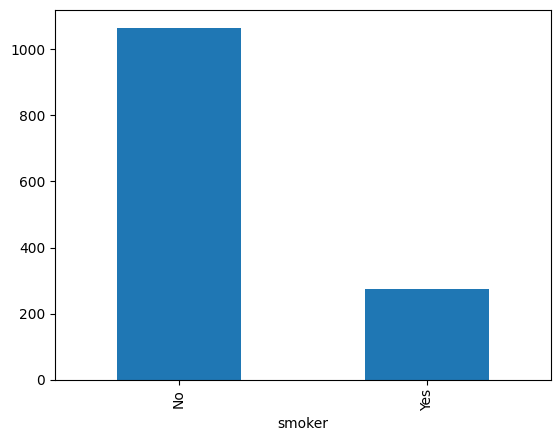

In [41]:
df['smoker'].value_counts().plot(kind='bar')

## Region

<Axes: ylabel='count'>

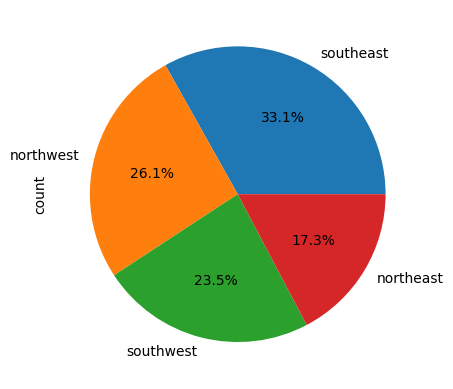

In [42]:
df['region'].value_counts().plot(kind='pie',autopct='%1.1f%%')

## Feature Engineering

In [43]:
def bmi_groups(bmi):
  if bmi < 18.5:
    return 'Underweight'
  elif bmi >= 18.5 and bmi < 25:
    return 'Normal'
  elif bmi >= 25 and bmi < 30:
    return 'Overweight'
  else:
    return 'Obesity'

In [44]:
df.insert(2,'bmi_groups',df['bmi'].apply(bmi_groups))

In [45]:
df

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,age,gender,bmi_groups,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,39.0,male,Normal,23.2,91,Yes,0,No,southeast,1121.87
1,24.0,male,Obesity,30.1,87,No,0,No,southeast,1131.51
2,NaN,male,Obesity,33.3,82,Yes,0,No,southeast,1135.94
3,NaN,male,Obesity,33.7,80,No,0,No,northwest,1136.40
4,NaN,male,Obesity,34.1,100,No,0,No,northwest,1137.01
...,...,...,...,...,...,...,...,...,...,...
1335,44.0,female,Obesity,35.5,88,Yes,0,Yes,northwest,55135.40
1336,59.0,female,Obesity,38.1,120,No,1,Yes,northeast,58571.07
1337,30.0,male,Obesity,34.5,91,Yes,3,Yes,northwest,60021.40
1338,37.0,male,Obesity,30.4,106,No,0,Yes,southeast,62592.87


## Age vs Gender

<Axes: xlabel='gender', ylabel='age'>

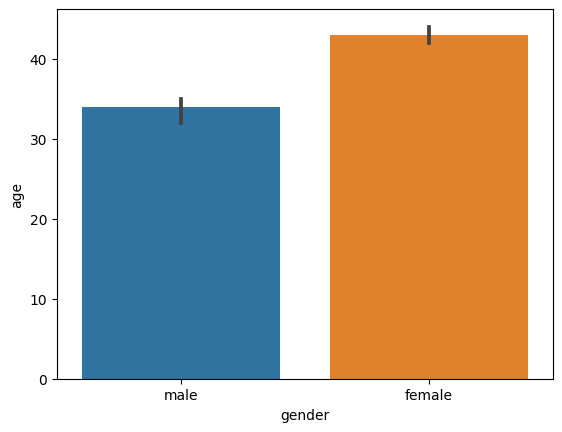

In [46]:
sns.barplot(data=df,x='gender',y='age',estimator='median')

<Axes: xlabel='gender', ylabel='age'>

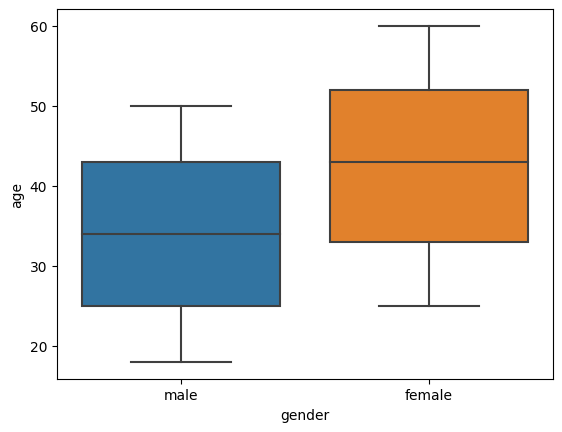

In [47]:
sns.boxplot(data=df,x='gender',y='age')

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

<Axes: xlabel='age', ylabel='Density'>

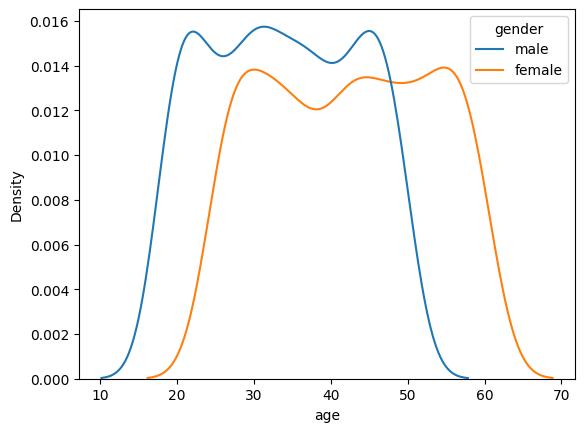

In [48]:
sns.kdeplot(data=df,x='age',hue='gender')

## Age vs bmi_groups (N vs C)

<Axes: xlabel='bmi_groups', ylabel='age'>

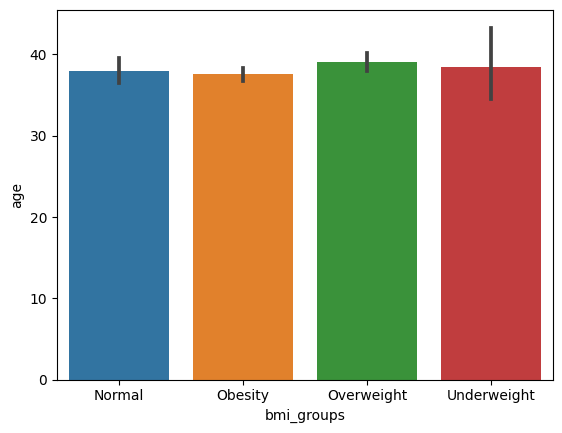

In [49]:
sns.barplot(data=df,x='bmi_groups',y='age')

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

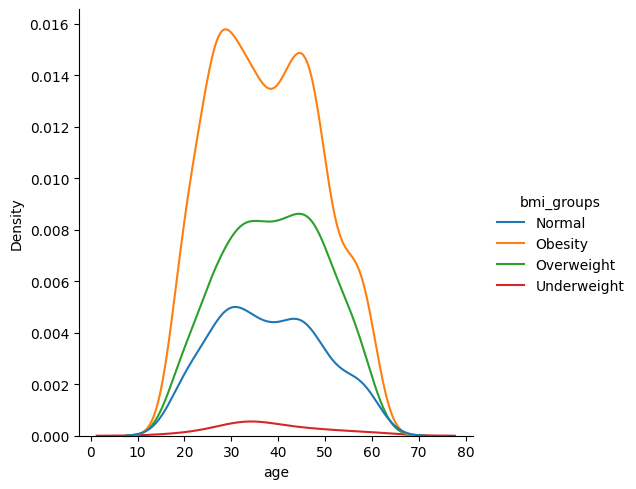

In [50]:
sns.displot(data=df,x='age',hue='bmi_groups',kind='kde')

<Axes: xlabel='bmi_groups', ylabel='age'>

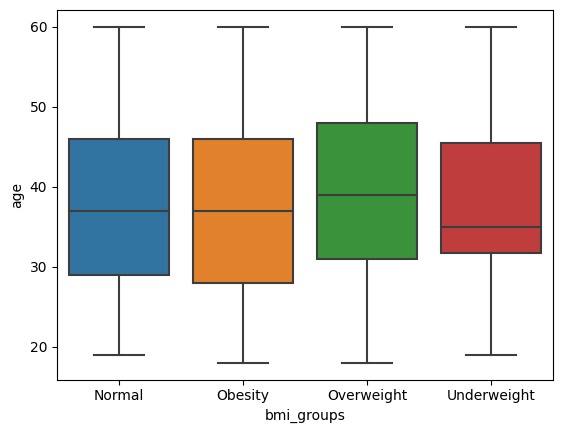

In [51]:
sns.boxplot(data=df,x='bmi_groups',y='age')

##Age vs bloodpressure

In [52]:
# Feature Engineering on age
def age(age):
  if age < 20:
    return 'Young'
  elif age >= 20 and age < 40:
    return 'Adult'
  else:
    return 'Old'

df.insert(0,'age_groups',df['age'].apply(age))

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

<Axes: xlabel='bloodpressure', ylabel='Density'>

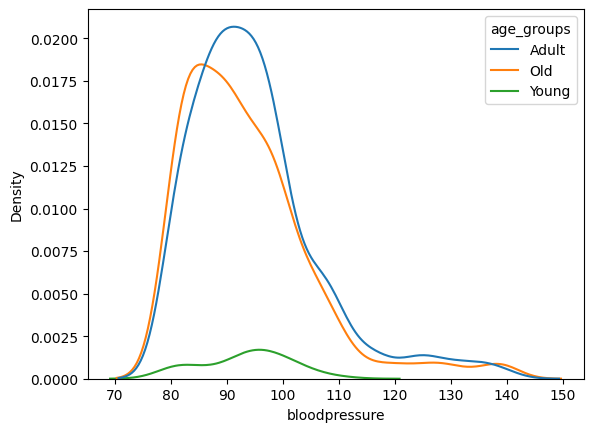

In [53]:
sns.kdeplot(data=df,x='bloodpressure',hue='age_groups')

In [54]:
df[(df['age_groups']== 'Old') & (df['bloodpressure'] > 135)]

,age_groups,age,gender,bmi_groups,bmi,bloodpressure,diabetic,children,smoker,region,claim
1156,Old,46.0,female,Normal,23.0,137,Yes,0,Yes,southeast,27037.91
1174,Old,44.0,female,Overweight,29.1,139,No,0,Yes,northwest,29141.36
1225,Old,50.0,female,Obesity,34.8,140,Yes,2,No,southwest,36910.61
1226,Old,46.0,male,Obesity,35.5,140,Yes,0,Yes,southeast,36950.26
1230,Old,58.0,female,Obesity,30.8,139,No,0,Yes,northeast,37270.15
1254,Old,46.0,male,Obesity,44.9,138,Yes,0,Yes,southeast,39722.75
1257,Old,43.0,male,Obesity,36.7,139,Yes,1,Yes,northeast,39774.28
1290,Old,47.0,male,Obesity,41.9,140,Yes,3,Yes,northeast,43753.34
1307,Old,47.0,male,Obesity,31.4,137,No,3,Yes,northwest,46130.53


<Axes: xlabel='age_groups', ylabel='bloodpressure'>

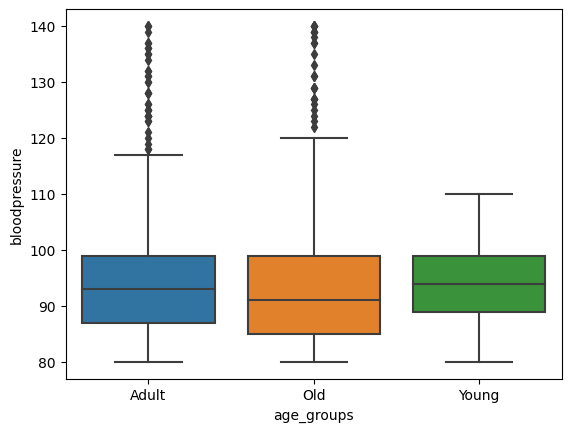

In [55]:
sns.boxplot(data=df,x='age_groups',y='bloodpressure')

In [56]:
df[(df['age_groups'] == 'Old') & (df['bloodpressure'] > 110)][['gender','bmi_groups','diabetic','smoker']].value_counts() / 50 * 100

gender  bmi_groups  diabetic  smoker
male    Obesity     Yes       Yes       18.0
female  Obesity     No        Yes       16.0
                    Yes       Yes       12.0
male    Obesity     No        Yes       12.0
female  Obesity     Yes       No         4.0
        Overweight  No        Yes        4.0
                    Yes       Yes        4.0
        Normal      Yes       Yes        2.0
        Overweight  No        No         2.0
male    Obesity     No        No         2.0
        Overweight  Yes       Yes        2.0
Name: count, dtype: float64

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age_groups', ylabel='bloodpressure'>

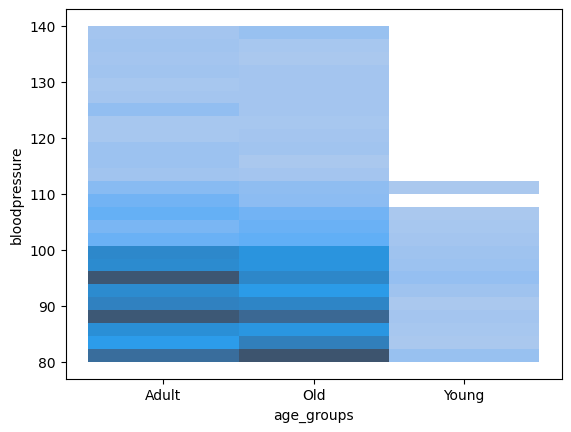

In [57]:
sns.histplot(data=df,x='age_groups',y='bloodpressure')

## Age vs diabetic

<Axes: xlabel='diabetic', ylabel='age'>

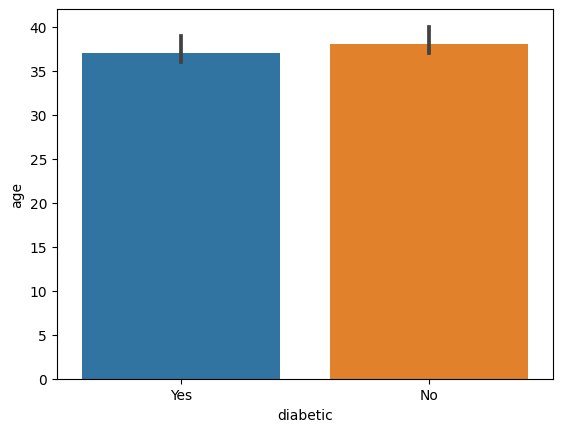

In [58]:
sns.barplot(data=df,x='diabetic',y='age',estimator='median')

<Axes: ylabel='age'>

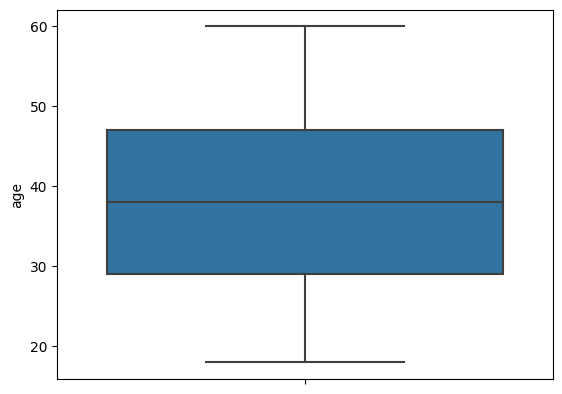

In [59]:
sns.boxplot(data=df,hue='diabetic',y='age')

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

<Axes: xlabel='age', ylabel='Density'>

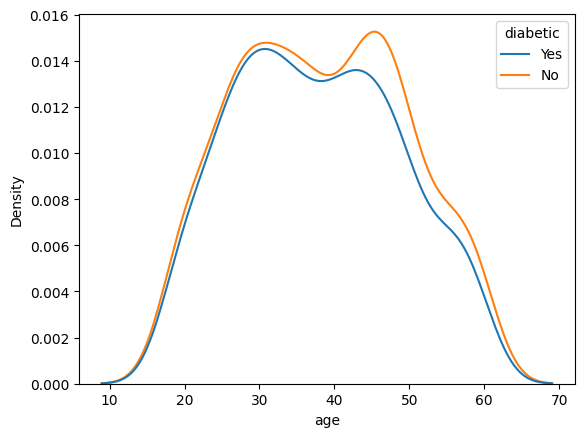

In [60]:
sns.kdeplot(data=df,hue='diabetic',x='age')

In [61]:
df[(df['diabetic'] == 'Yes') & (df['age'] > 40)]

/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


,age_groups,age,gender,bmi_groups,bmi,bloodpressure,diabetic,children,smoker,region,claim
18,Old,49.0,male,Obesity,35.4,97,Yes,0,No,southwest,1263.25
19,Old,48.0,male,Obesity,33.3,91,Yes,0,No,southeast,1391.53
20,Old,45.0,male,Normal,23.2,85,Yes,0,No,southeast,1515.34
24,Old,50.0,female,Normal,20.8,85,Yes,0,No,southeast,1607.51
34,Old,43.0,female,Obesity,38.2,86,Yes,0,No,southeast,1631.67
...,...,...,...,...,...,...,...,...,...,...,...
1306,Old,43.0,female,Obesity,47.6,112,Yes,2,Yes,southwest,46113.51
1316,Old,41.0,male,Obesity,41.8,109,Yes,2,Yes,southeast,47269.85
1325,Old,52.0,female,Obesity,36.4,133,Yes,1,Yes,northeast,48517.56
1329,Old,52.0,female,Obesity,37.7,109,Yes,0,Yes,southwest,48824.45


## Age vs smoker

<Axes: xlabel='smoker', ylabel='age'>

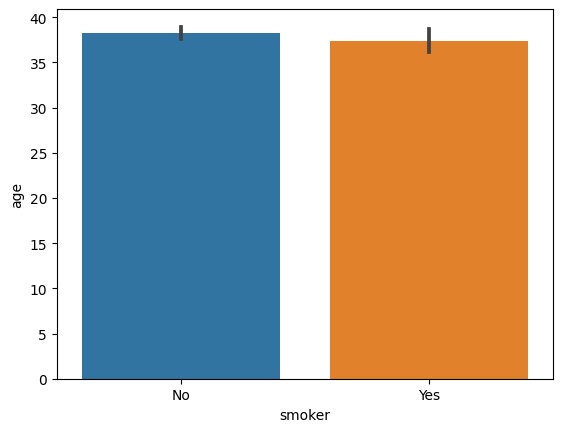

In [62]:
sns.barplot(data=df,x='smoker',y='age')

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

<Axes: xlabel='age', ylabel='Density'>

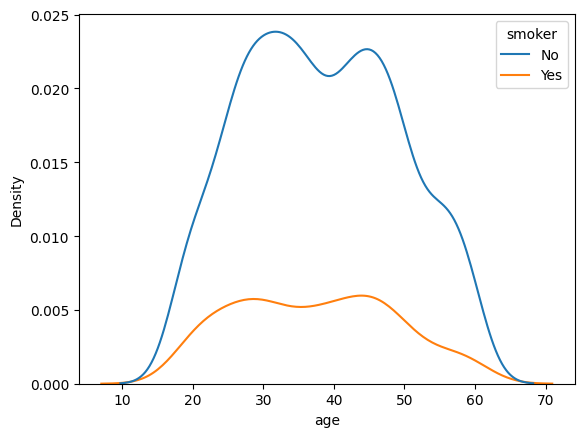

In [63]:
sns.kdeplot(data=df,hue='smoker',x='age')

## Age vs region

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

<Axes: xlabel='age', ylabel='Density'>

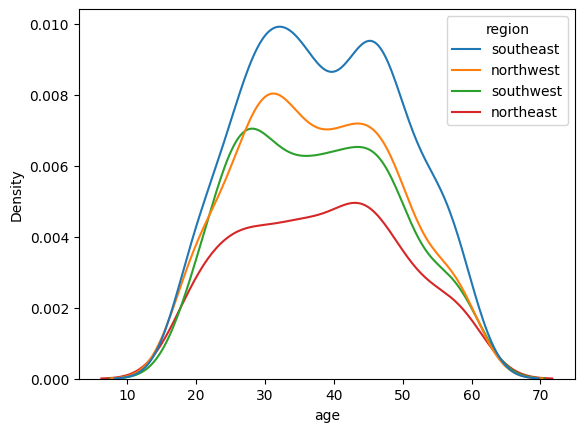

In [64]:
sns.kdeplot(data=df,hue='region',x='age')

## Gender vs bmi

<Axes: xlabel='bmi_groups', ylabel='gender'>

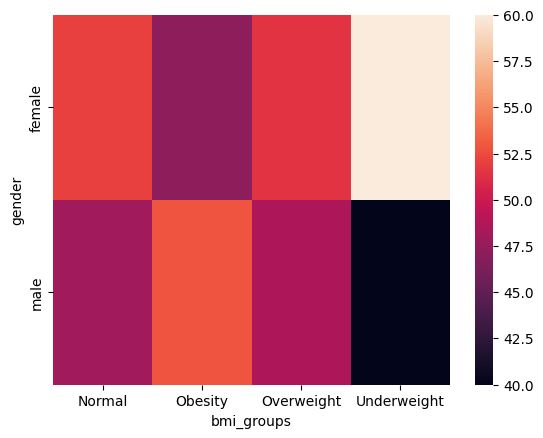

In [65]:
sns.heatmap(pd.crosstab(df['gender'],df['bmi_groups'],normalize='columns')*100)

##Gender vs diabetic

In [66]:
pd.crosstab(df['gender'],df['diabetic'],normalize='columns')*100

diabetic,No,Yes
gender,,
female,48.567335,50.311526
male,51.432665,49.688474


## Gender vs claim

<Axes: xlabel='gender', ylabel='claim'>

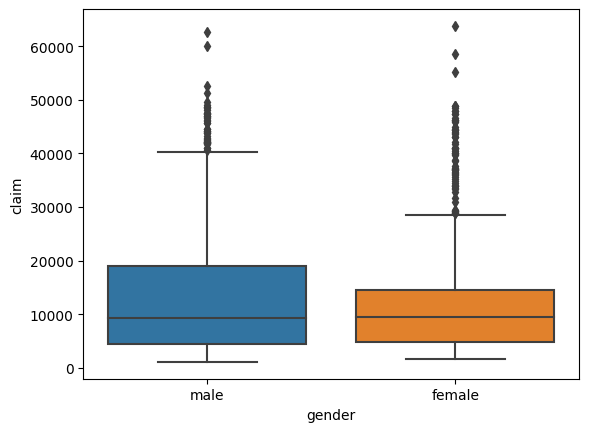

In [67]:
sns.boxplot(data=df,x='gender',y='claim')

In [68]:
df[(df['gender'] == 'female') & (df['claim'] > 30000)][['smoker']].value_counts()

smoker
Yes       54
No         5
Name: count, dtype: int64

## Multivariate Analysis
- Since there are these columns which are age_groups, bmi_groups, bloodpressure, diabetic, smoker, claim which ae more likely to be linked together in many ways:

In [69]:
df = df[['age_groups','bmi_groups','bloodpressure','diabetic','smoker','claim']]

In [70]:
df.head()

,age_groups,bmi_groups,bloodpressure,diabetic,smoker,claim
0,Adult,Normal,91,Yes,No,1121.87
1,Adult,Obesity,87,No,No,1131.51
2,Old,Obesity,82,Yes,No,1135.94
3,Old,Obesity,80,No,No,1136.40
4,Old,Obesity,100,No,No,1137.01


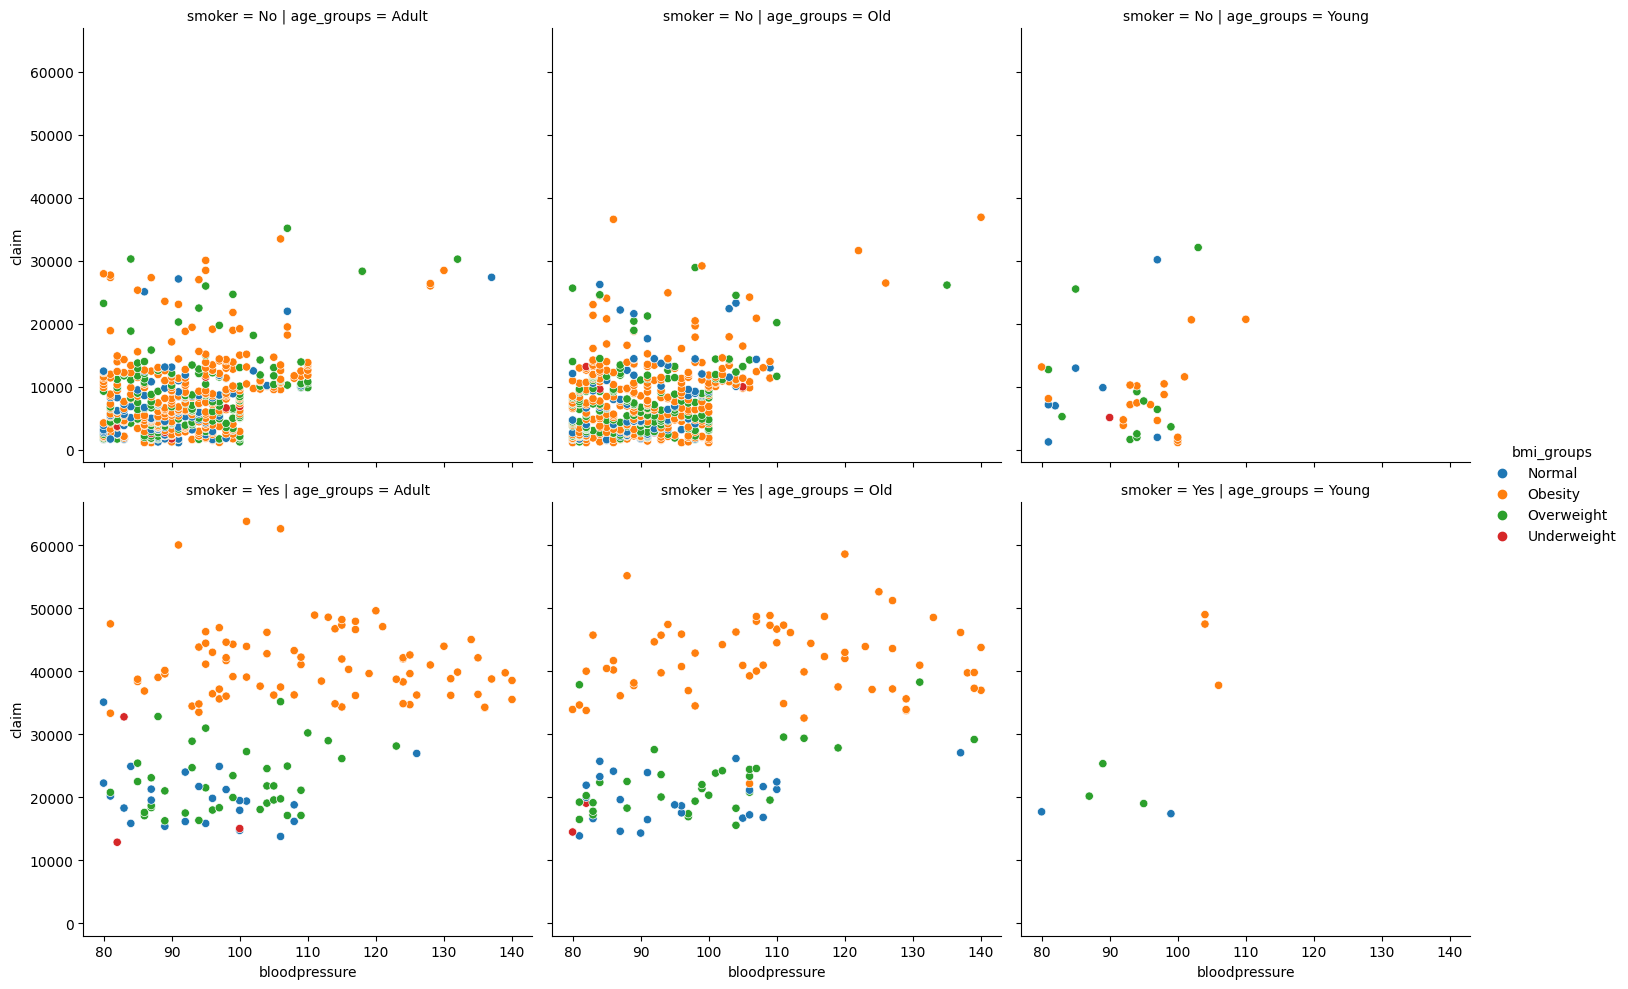

In [71]:
sns.relplot(data=df,x='bloodpressure',y='claim',hue='bmi_groups',col='age_groups',row='smoker',kind='scatter')

# 📃 Conclusions:

Columns Types:

1. Numerical - age, BMI , blood pressure, children, claim
2. Categorical - gender, diabetic, smoker, region

-> Null values are present in age, region .

Feature Engineering -
1. BMI column to make categories of overweight, lightweight etc.
2. Age groups distinction

Univariate Analysis Conclusions: 

1.  Age - Most people claims insurance at the age  of 30-35 and 43-45. 
		Skewness near to zero means nearly normal distribution.
		People with the age greater than 50 are females. Which signifies that women with the greater age are more likely to 
claim insurance.
		No outliers in the age column...Yay
		
2.  BMI - Most people have the BMI nearly in the range of 25-40 means that these people who have claimed already are in the category of overweight.
		25% of the people have the BMI greater than 34.7
		Outliers are there but they are like original data so cannot be removed.

3. Blood pressure - Most people have the blood pressure value between 90 - 100.
				5% people have the blood pressure values greater than 115 and it is highly positive  skewed.

4. Children - 40% of the people have 0 children and near to 20 % of the people have one or two children whereas 10% are having three and 2% of the people 4 and 5 children

5. Claim - The amount of the claim that been there is varying between 0-20000 and some people are there claiming 40000 nearly.

		97% people claiming greater than 35000 money are smokers. and out the data of this category 63% people are males and 37% people are females.

6.  Gender - Male and Females are equally probable to have disease so that they claims insurance.

7. Diabetic - 48% people are diabetic whereas 52%  are not

8. Smoker - 80% people are non smokers and 20% people are smokers.

9. Region - 33% people are from southeast, 25% from north and south west , 17% from northeast


Bivariate Analysis:

1. Age vs Gender - Average age of a male who claims is nearly equal to 35 and for female is 43.
					Males when young or in growing old age are more likely to claim insurance where as females when become old at the age near to 60 are mor likely to claim the insurance.

2. Age vs BMI_groups - The obese and overweight people are more likely to be present in 25-45 age groups who had claimed the insurance.
						Normal people median age is 38, Obese people 38, overweight 40, underweight 33

3.  age_groups vs blood pressure - A general trend is that the old people blood pressure is near to 80 where as adult people have it near to 90 and young generation has it near to 100.
								A separate trend shows that there are old people who has blood pressure greater than 140 and almost all of them are smokers so general trend comes out to be like smokers have high blood pressure and they are also obese and more prone to diseases and claims.
								A person who is obese and smoker has nearly 95 percent chance to be claimed the insurance.
								Old and adult category of blood pressure having 80-100 and smoker have high chance to be claiming the insurance.
		
4. age vs diabetic -  Median age of having diabetes is 38. 

5. Gender vs BMI - Nearly same mal and females are normal , obesity, overweight but in case of underweight category females are more as compared to males

6.  gender vs claim - Male who are obese and are smokers have very high claiming amount
					Females who are smokers and mostly fall under category of obesity charge high claims.

Multivariate Analysis - Since there are these columns which are age_groups, bmi_groups, bloodpressure, diabetic, smoker, claim which ae more likely to be linked together in many ways:

- After multivariate analysis the main observation is coming that the people who are non smokers have less blood pressure and are more likely to have less diseases and  the claim will be less and this does not belong to the age groups and gender.

- Smokers of any age groups are likely to be more prone to disease and have high claims and their blood pressure is so much high.

								


## 👏👏 Completion of the EDA:

#### Above are the observations that I seen in the dataset. Since this is an iterative process so it will take time and if any other person would like to change the notebook and add some more features or suggest some more in the discussions and share some valuable feedback...It will be interesting to learn from the PRO's of their arena...Thanks for seeing it and  give it a upvote if you liked it.